# COVID-19 Data analysis for France, french data source

Data extracted from french repository https://github.com/opencovid19-fr/data, which comes from the french goverment and display the daily evolution for region and department. Check https://veille-coronavirus.fr/ for a dashboard with a data balance.
Extra info from data set at https://www.data.gouv.fr/en/datasets/chiffres-cles-concernant-lepidemie-de-covid19-en-france/#_

Data is read from github repository and exploited according to each analysis

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import datetime
import re
import math
# import local functions
import covid19_analysis.dataFun as df
import covid19_analysis.dataPlot as dplot

In [8]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
# Define path from online repo
repo_url='https://raw.githubusercontent.com/opencovid19-fr/data/master/'
cases_path = 'dist/chiffres-cles.csv'

# Get data from online repo
df_c_raw=pd.read_csv(repo_url+cases_path, parse_dates=['date'])

## Whole country status

In [10]:
date_time = df_c_raw.date.unique()
print(df_c_raw.granularite.unique())
# Get data for country only (exclude world, department, and others)
df_fr = df_c_raw.loc[(df_c_raw.granularite == 'pays') & (df_c_raw.source_nom == 'Santé publique France')]

['departement' 'pays' 'region' 'monde' 'collectivite-outremer']


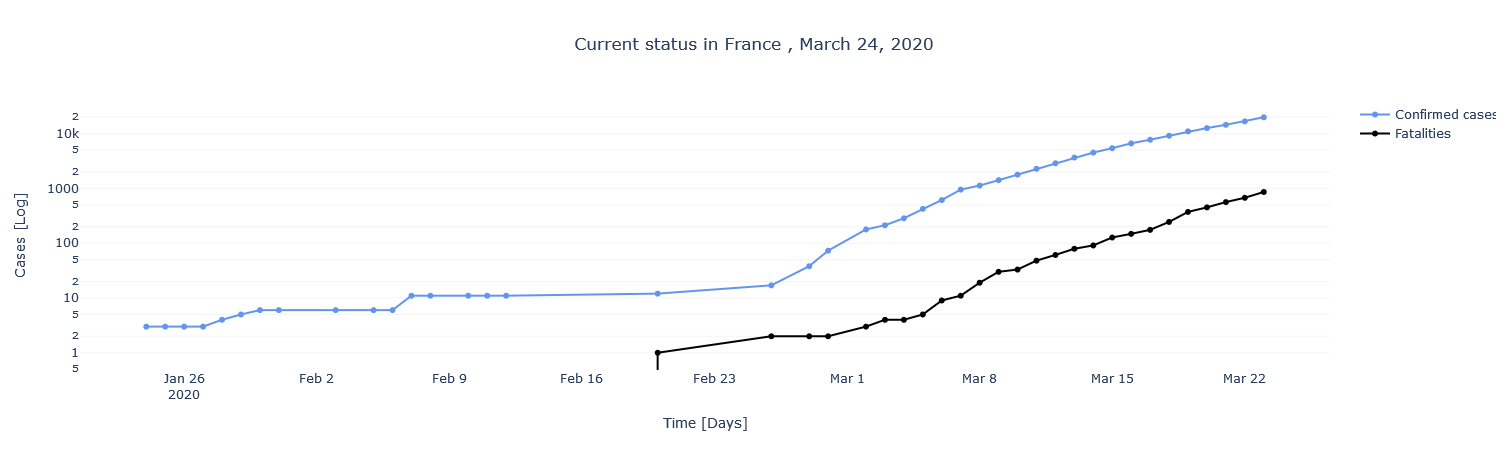

In [11]:
dplot.disp_cumulative(df_fr, 'France')

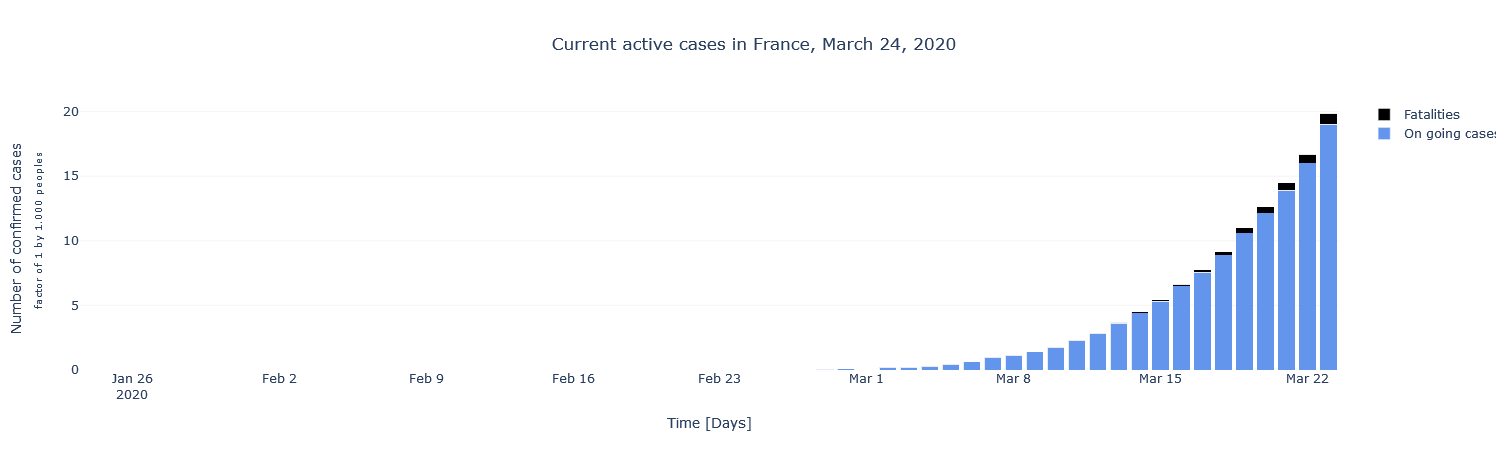

In [12]:
dplot.disp_current_cases(df_fr, 'France', pop_factor=1000)

The evolution of the disease in France has a steady grow (21 March 2020) for confirmed cases and a almost exponencial grow for fatalities. The next graph display the daily evolution of the virus

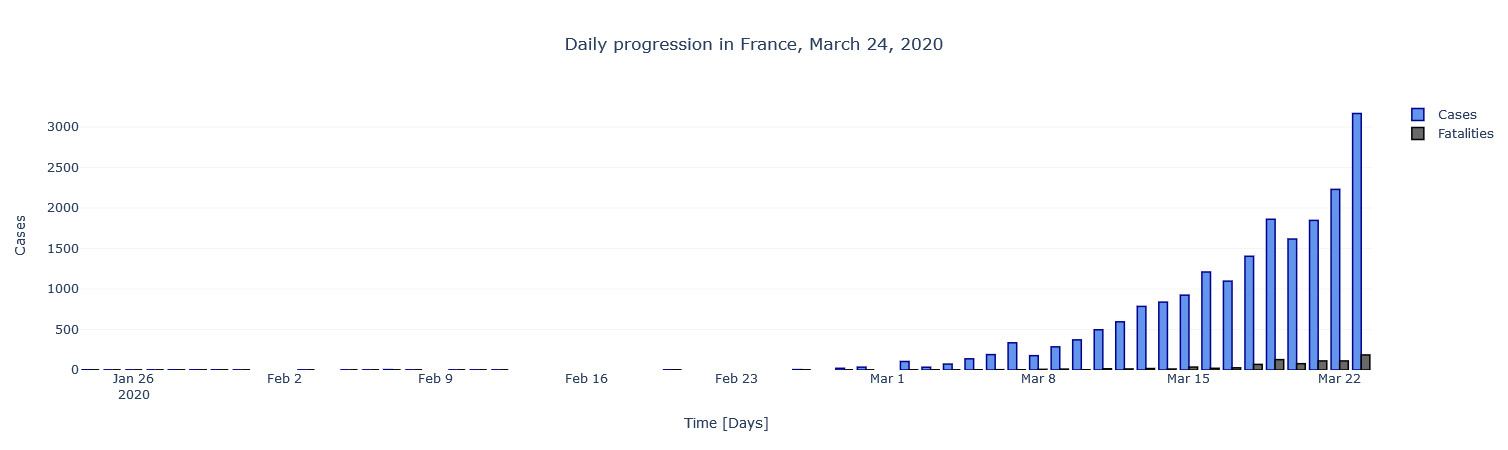

In [48]:
dplot.disp_daily_cases(df_fr, 'France', 'SPF')

## Situation in Auvergne-Rhône-Alpes region

In [49]:
df_allReg = df_c_raw.loc[df_c_raw.granularite == 'region']
print('List for all regions')
all_reg_list = df_allReg.maille_nom.unique()
print(all_reg_list)

List for all regions
['Ile-de-France' 'Nouvelle-Aquitaine' 'Auvergne Rhône-Alpes'
 'Bourgogne-Franche-Comté' 'Hauts-de-France' 'Grand-Est'
 'Auvergne-Rhône-Alpes' 'Guadeloupe' 'Martinique' 'Guyane' 'La Réunion'
 'Mayotte' 'Centre-Val de Loire' 'Normandie' 'Pays de la Loire' 'Bretagne'
 'Occitanie' 'Provence-Alpes-Côte d’Azur' 'Corse' 'Île-de-France'
 'Grand Est' "Provence-Alpes-Côte d'Azur"]


Select region and data source from dataset

In [50]:
reg_std = 'Auvergne-Rhône-Alpes'
#df_reg = df_allReg.loc[(df_allReg.maille_nom == reg_std) & (df_allReg.source_nom == 'Santé publique France')]
df_reg = df_allReg.loc[(df_allReg.maille_nom == reg_std) & (df_allReg.source_nom == 'ARS Auvergne-Rhône-Alpes')]

Display the evolution of the coronavirus in Auvergne-Rhône-Alpes for the last months, for the dataset with source from Sante publique France, doest not display the number of fatalities, compare to the data source ARS AuvergneRhoneAlpes. for the moment the chart use the ARS source (21 March 2020)

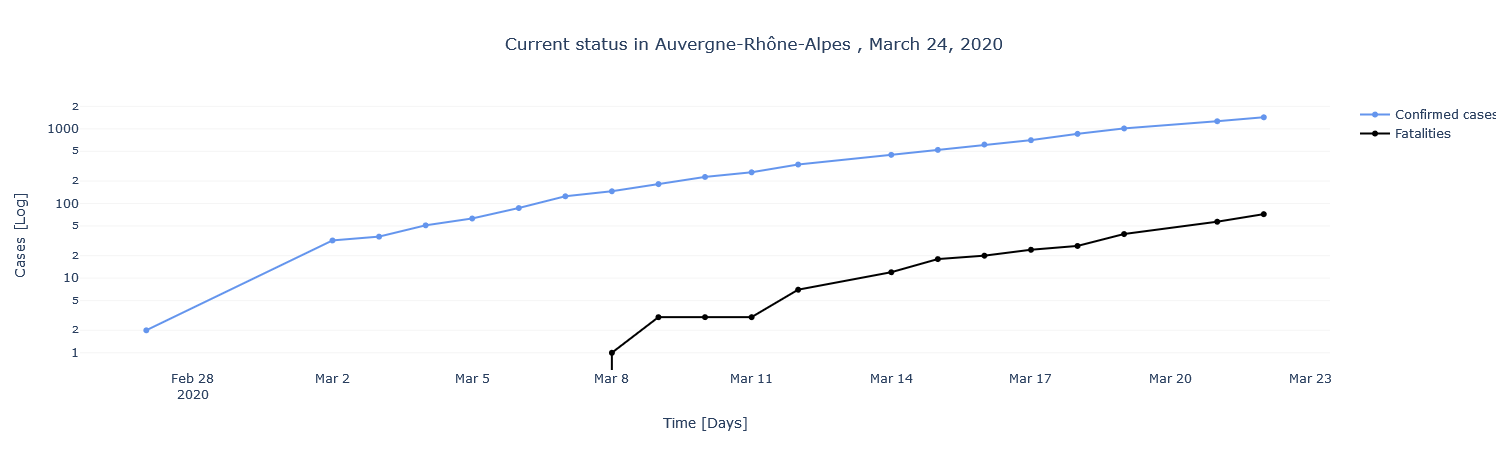

In [51]:
dplot.disp_cumulative(df_reg, reg_std)

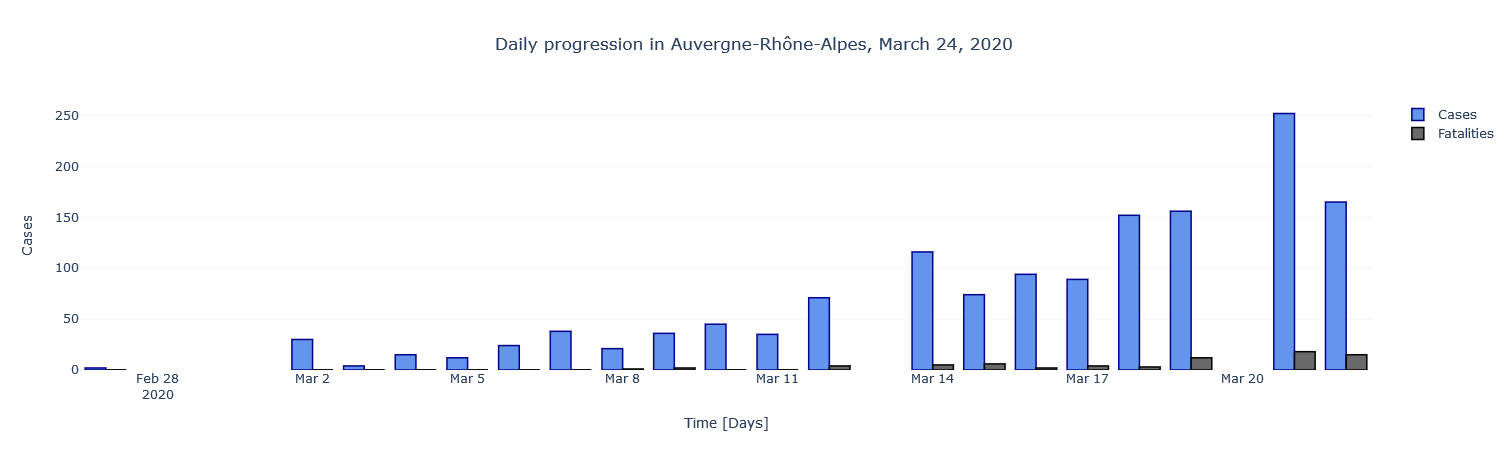

In [52]:
dplot.disp_daily_cases(df_reg, reg_std, 'SPF')

## Situation in Savoie department

In [53]:
df_allDep = df_c_raw.loc[df_c_raw.granularite == 'departement']
print('List for all departments')
all_dep_list = df_allDep.maille_nom.unique()
print(all_dep_list)

List for all departments
['Charente' 'Charente-Maritime' 'Corrèze' 'Creuse' 'Dordogne' 'Gironde'
 'Landes' 'Lot-et-Garonne' 'Pyrénées-Atlantiques' 'Deux-Sèvres' 'Vienne'
 'Haute-Vienne' 'Hérault' 'Haute-Savoie' 'Aisne' 'Doubs' 'Nord' 'Oise'
 'Pas-de-Calais' 'Somme' 'Territoire de Belfort' "Côte-d'Or" 'Finistère'
 'Loire-Atlantique' 'Bas-Rhin' 'Alpes-Maritimes' 'Maine-et-Loire'
 'Mayenne' 'Seine-Maritime' 'Ille-et-Vilaine' 'Morbihan' 'Sarthe' 'Ain'
 'Ardennes' 'Aube' 'Eure' 'Marne' 'Haute-Marne' 'Meurthe-et-Moselle'
 'Meuse' 'Moselle' 'Haut-Rhin' 'Rhône' 'Vosges' 'Allier' 'Ardèche'
 'Cantal' 'Drôme' 'Gard' 'Isère' 'Loire' 'Haute-Loire' 'Puy-de-Dôme'
 'Saône-et-Loire' 'Savoie' 'Aveyron' 'Bouches-du-Rhône' "Côtes-d'Armor"
 'Eure-et-Loir' 'Indre-et-Loire' 'Haute-Saône' 'Vaucluse' 'Guyane'
 'Hautes-Alpes' 'Calvados' 'Cher' 'Corse-du-Sud' 'Haute-Corse'
 'Haute-Garonne' 'Indre' 'Loir-et-Cher' 'Loiret' 'Manche' 'Paris'
 'Seine-et-Marne' 'Yvelines' 'Var' 'Essonne' 'Hauts-de-Seine'
 'Seine-Saint

In [59]:
dep_std = 'Savoie'
df_dep = df_allDep.loc[(df_allDep.maille_nom == dep_std) & (df_allDep.source_nom == 'ARS Auvergne-Rhône-Alpes')]

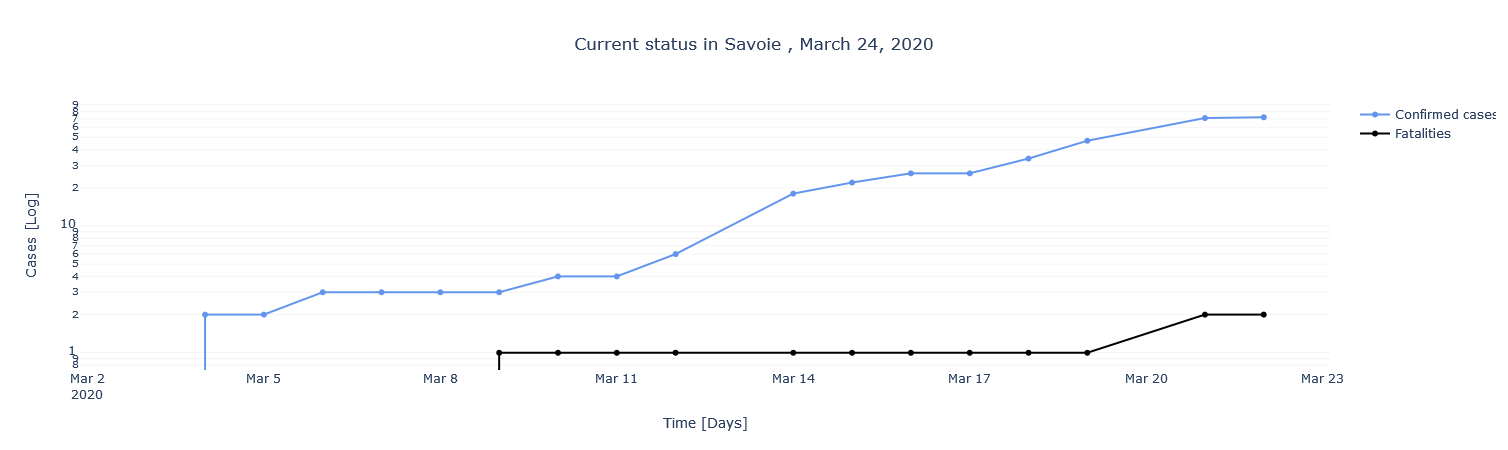

In [61]:
dplot.disp_cumulative(df_dep,dep_std)

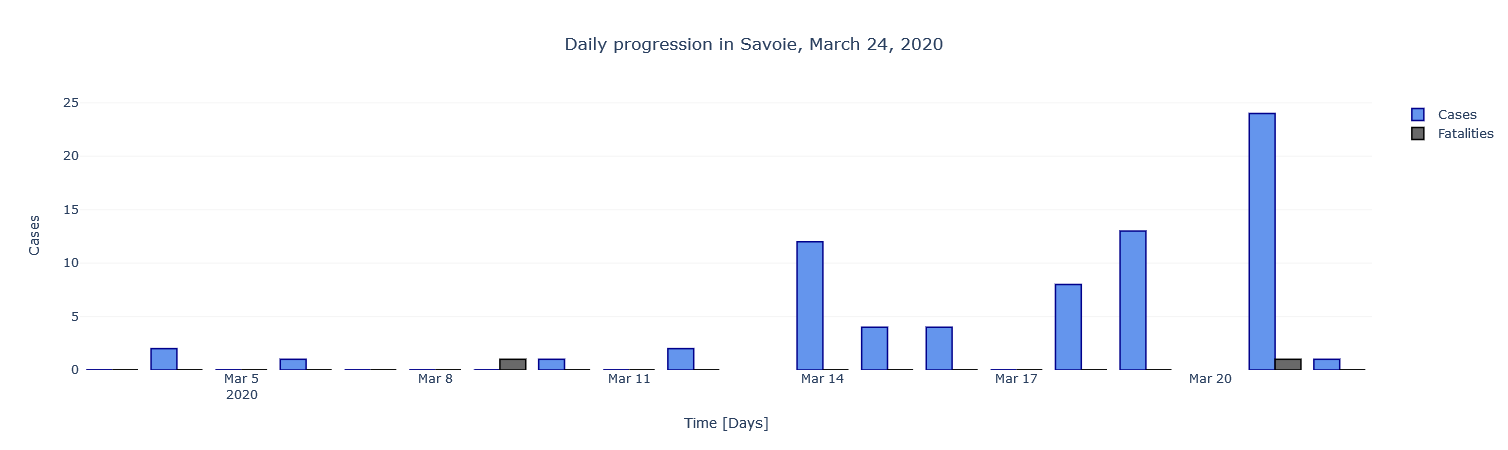

In [62]:
dplot.disp_daily_cases(df_dep, dep_std, 'SPF')